# Setup to use Qiskit simulators

Qiskit needs a Python environment, it is a package that you need to install. For example, you can install `Anaconda` and run in the `Anaconda Command Prompt`:

* `pip install qiskit`
* `pip install qiskit-ibm-runtime`
* `pip install qiskit[visualization]`

For Qiskit Aer (= package for simulation), you additionally need:

* `pip install qiskit-aer`


See documentation here: https://docs.quantum.ibm.com/start/install

See Aer documentation here: https://qiskit.org/ecosystem/aer/getting_started.html

Use this overview: https://qiskit.org/ecosystem/aer/tutorials/index.html

In [1]:
import qiskit
from qiskit_aer import AerSimulator

### 1. Build a circuit

In [2]:
# Generate 3-qubit GHZ state
circuit = qiskit.QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure_all()

circuit.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

### 2. Connect to the simulator

In [3]:
# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
# OLD: result_ideal = qiskit.execute(circuit, aersim).result()
# NEW: result_ideal = backend.run(circuit).result()
result_ideal = aersim.run(circuit).result()
counts_ideal = result_ideal.get_counts(0)

print('Counts(ideal):', counts_ideal)

Counts(ideal): {'000': 526, '111': 498}


### 3. Visualize output


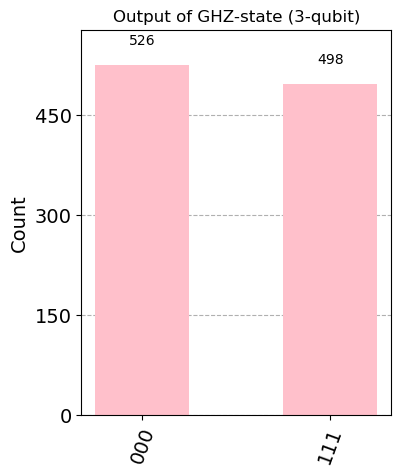

In [4]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts_ideal, 
               title='Output of GHZ-state (3-qubit)',
               figsize=(4,5),
               color='pink')

### 4. Use real quantum computer

To connect to a real quantum backend, you can do so locally by getting a `token` or you go directly via https://quantum.ibm.com/. 

Either way, please sign in to IBM (free account) and look through the dashboard to get an overview. :)

To find the `token`, go to the right upper corner on the homepage. You can put it in your local notebook when you require cloud access to a real quantum computer and not a simulator.

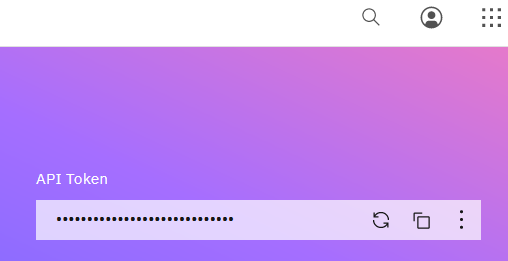

In [6]:
# We connect to the cloud as a service
from qiskit_ibm_runtime import QiskitRuntimeService

# Connect with your token to ensure ability to use the real backends
QiskitRuntimeService.save_account(channel="ibm_quantum", token="<API Token copy to here>", set_as_default=True, overwrite=True)

service = QiskitRuntimeService()

In [7]:
# list the possible quantum computers
service.backends()

[<IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

In [8]:
# You can filter out the simulators
print("Simulators:")
print(service.backends(simulator=True, operational=True), '\n')

print("Real Quantum Chip:")
print(service.backends(simulator=False, operational=True), '\n')

print("Least busy backend with min. 7 qubits:", service.least_busy(simulator=False, operational=True, min_num_qubits=7))

print("Least busy backend with min. 5 qubits:", service.least_busy(simulator=False, operational=True, min_num_qubits=7))

Simulators:
[<IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>] 

Real Quantum Chip:
[<IBMBackend('ibm_osaka')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_sherbrooke')>] 

Least busy backend with min. 7 qubits: <IBMBackend('ibm_sherbrooke')>
Least busy backend with min. 5 qubits: <IBMBackend('ibm_sherbrooke')>


### 5. Check the quantum chip's queue

You can check many attributes on a chosen backend, see here: https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.IBMBackend

**ATTENTION**
* You may get asked for the `graphviz` package.
* Please save the notebook, close everything and start a new Anaconda command prompt.
* Type: `conda install graphviz`
* You are then able to open the notebook again.
* If you reopen the notebook, it may be needed to set `overwrite=True` in the backend connection.

**Question?**
* Between the two circuits on the backend, what are the differences? Why?

In [9]:
backend = service.backend("ibm_sherbrooke")

In [10]:
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

In [11]:
print(status, is_operational, '\n')
print("Jobs in queue:", jobs_in_queue, '\n')
print('Birthday:', backend.online_date)

<qiskit.providers.models.backendstatus.BackendStatus object at 0x000001B74AAAA9D0> True 

Jobs in queue: 55 

Birthday: 2022-09-23 04:00:00+00:00


        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 


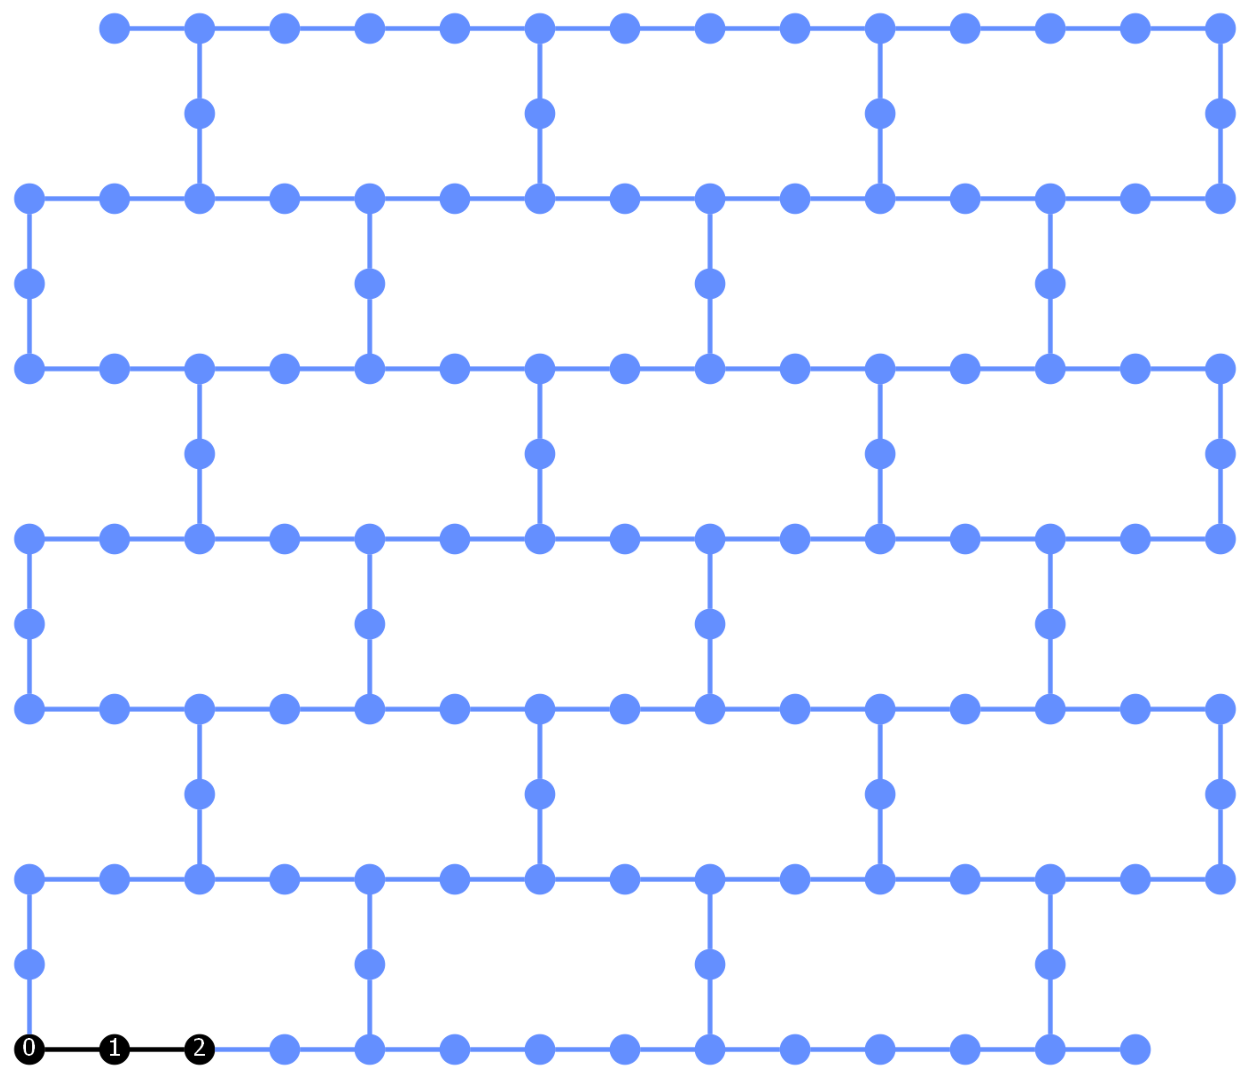

In [15]:
##################################
# TRANSPILE CIRCUIT FOR BACKEND
##################################
print(circuit.draw())
circuit_ex = qiskit.transpile(circuit, backend=backend)
qiskit.visualization.plot_circuit_layout(circuit_ex, backend, view='virtual', qubit_coordinates=None)

        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 


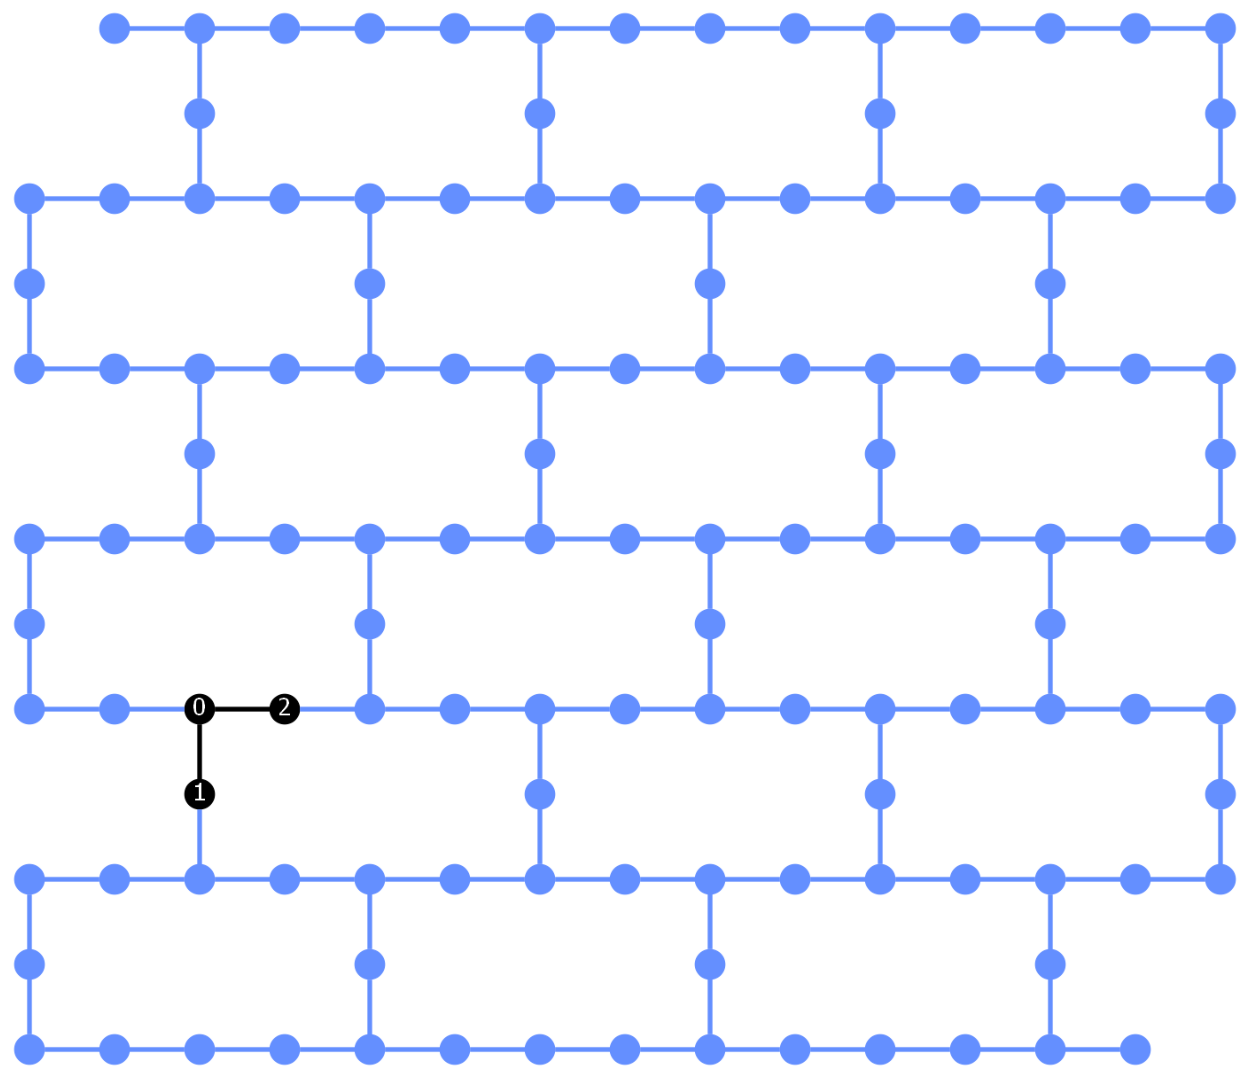

In [22]:
# Generate a second entanglement circuit
circuit2 = qiskit.QuantumCircuit(3)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(0,2)
circuit2.measure_all()

print(circuit2.draw())
circuit2_ex = qiskit.transpile(circuit2, backend=backend)
qiskit.visualization.plot_circuit_layout(circuit2_ex, backend, view='virtual', qubit_coordinates=None)

### 6. Execute the circuits and plot histograms

* Sampler
* Estimator

... these are two "delivery packages" we put our circuits into so that the backend understands the task well. There are different use cases for each, if we want the probabilities `Sampler` is better.

In [32]:
import qiskit_ibm_runtime

sampler = qiskit_ibm_runtime.Sampler(backend=backend)
job = sampler.run(circuit_ex)
result = job.result()

runtime_job._start_websocket_client:WARNING:2024-05-02 00:07:44,400: An error occurred while streaming results from the server for job crsbebhdbt40008jm5hg:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 548, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\qiskit_ibm_provider\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\qiskit_ibm_provider\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_provider.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



Sampler job ID: crsbebhdbt40008jm5hg


AttributeError: 'SamplerResult' object has no attribute 'data'

In [35]:
result

SamplerResult(quasi_dists=[{0: 0.519430333050119, 1: 0.008213941052992, 2: -0.000445511851433, 3: 0.001817256589026, 4: -0.002411007300518, 5: -0.000659480631903, 6: 0.003075155237891, 7: 0.470979313853828}], metadata=[{'shots': 4000, 'circuit_metadata': {}, 'readout_mitigation_overhead': 1.3551313518292625, 'readout_mitigation_time': 0.06902121007442474, 'warning': 'Optimization level clipped from 3 to 1'}])